In [45]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn import  metrics
import matplotlib.pyplot as plt
from pprint import pprint
import statsmodels.api as sm
from stargazer.stargazer import Stargazer

In [46]:
stkcode=pd.read_excel('stkcode.xlsx')
data={}
for i in stkcode['code']:
    data[i]=pd.read_excel(f'{i}.xlsx')
data

{503:       stkcode        date  stkclose        trdsum  dampltd        rf  \
 0         503  2013-01-07      9.12  2.030455e+08   2.7987  0.000107   
 1         503  2013-01-08      9.20  2.163447e+08   2.8509  0.000107   
 2         503  2013-01-09      9.52  2.739355e+08   5.7609  0.000107   
 3         503  2013-01-10      9.03  3.213901e+08   6.9328  0.000107   
 4         503  2013-01-11      8.83  1.956859e+08   3.1008  0.000107   
 ...       ...         ...       ...           ...      ...       ...   
 2253      503  2023-03-27     10.97  2.408894e+08   2.9650  0.000067   
 2254      503  2023-03-28     10.78  1.290118e+08   2.3701  0.000067   
 2255      503  2023-03-29     10.71  1.674875e+08   3.7106  0.000067   
 2256      503  2023-03-30     10.40  1.583287e+08   3.3613  0.000067   
 2257      503  2023-03-31     10.90  2.685735e+08   6.2500  0.000067   
 
       RiskPremium1      SMB1      HML1      RMW1      CMA1  YYYYmm  \
 0         0.003761  0.010096 -0.002014 -0.004

In [47]:
columns=[]
dataL1={}
columnsL1=[]
for i in data:
    columns=np.append(data[i].columns.values[3:11],data[i].columns.values[-3:])
    columnsL1=columns.copy()
    columnsL1=list(columnsL1)
    for j in columns:
        columnsL1.append(j+'L1')
        data[i][j+'L1']=data[i][j].shift(periods=1)
    for l in data[i].columns.values[0:3]:
        columnsL1.append(l)
    columnsL1.append('YYYYmm')
    dataL1[i]=data[i][columnsL1]
dataL1

{503:             trdsum  dampltd        rf  RiskPremium1      SMB1      HML1  \
 0     2.030455e+08   2.7987  0.000107      0.003761  0.010096 -0.002014   
 1     2.163447e+08   2.8509  0.000107     -0.006667  0.012550 -0.007672   
 2     2.739355e+08   5.7609  0.000107     -0.001212  0.002407 -0.003288   
 3     3.213901e+08   6.9328  0.000107      0.003885  0.002622  0.004782   
 4     1.956859e+08   3.1008  0.000107     -0.016251 -0.004473  0.000358   
 ...            ...      ...       ...           ...       ...       ...   
 2253  2.408894e+08   2.9650  0.000067     -0.006374  0.002265 -0.003920   
 2254  1.290118e+08   2.3701  0.000067      0.000790 -0.005440  0.003884   
 2255  1.674875e+08   3.7106  0.000067     -0.002534 -0.005063 -0.004080   
 2256  1.583287e+08   3.3613  0.000067      0.005986 -0.012989 -0.000733   
 2257  2.685735e+08   6.2500  0.000067      0.003611  0.009281 -0.002449   
 
           RMW1      CMA1  indexclose   stkdret  ...    HML1L1    RMW1L1  \
 0   

In [48]:
for i in dataL1:
    dataL1[i].dropna(inplace=True)
dataL1

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13456\2667033078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataL1[i].dropna(inplace=True)


{503:             trdsum  dampltd        rf  RiskPremium1      SMB1      HML1  \
 1     2.163447e+08   2.8509  0.000107     -0.006667  0.012550 -0.007672   
 2     2.739355e+08   5.7609  0.000107     -0.001212  0.002407 -0.003288   
 3     3.213901e+08   6.9328  0.000107      0.003885  0.002622  0.004782   
 4     1.956859e+08   3.1008  0.000107     -0.016251 -0.004473  0.000358   
 5     1.594411e+08   4.9830  0.000107      0.030524  0.002484 -0.001369   
 ...            ...      ...       ...           ...       ...       ...   
 2253  2.408894e+08   2.9650  0.000067     -0.006374  0.002265 -0.003920   
 2254  1.290118e+08   2.3701  0.000067      0.000790 -0.005440  0.003884   
 2255  1.674875e+08   3.7106  0.000067     -0.002534 -0.005063 -0.004080   
 2256  1.583287e+08   3.3613  0.000067      0.005986 -0.012989 -0.000733   
 2257  2.685735e+08   6.2500  0.000067      0.003611  0.009281 -0.002449   
 
           RMW1      CMA1  indexclose   stkdret  ...    HML1L1    RMW1L1  \
 1   

In [49]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import datetime as dt
# import sklearn.model_selection as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import pydot
from sklearn.preprocessing import MinMaxScaler

In [50]:
# for i in dataL1:
#     dataL1[i].to_excel(f'dataL1\{i}.xlsx',index=False)
#还是可以用的

In [56]:
dataL1[503]

trdsum  dampltd        rf  RiskPremium1      SMB1      HML1  \
1     2.163447e+08   2.8509  0.000107     -0.006667  0.012550 -0.007672   
2     2.739355e+08   5.7609  0.000107     -0.001212  0.002407 -0.003288   
3     3.213901e+08   6.9328  0.000107      0.003885  0.002622  0.004782   
4     1.956859e+08   3.1008  0.000107     -0.016251 -0.004473  0.000358   
5     1.594411e+08   4.9830  0.000107      0.030524  0.002484 -0.001369   
...            ...      ...       ...           ...       ...       ...   
2253  2.408894e+08   2.9650  0.000067     -0.006374  0.002265 -0.003920   
2254  1.290118e+08   2.3701  0.000067      0.000790 -0.005440  0.003884   
2255  1.674875e+08   3.7106  0.000067     -0.002534 -0.005063 -0.004080   
2256  1.583287e+08   3.3613  0.000067      0.005986 -0.012989 -0.000733   
2257  2.685735e+08   6.2500  0.000067      0.003611  0.009281 -0.002449   

          RMW1      CMA1  indexclose   stkdret  ...    HML1L1    RMW1L1  \
1    -0.001519  0.002452   2276.0700  0.008734  ... -0.002014 -0.004582   
2     0.001126 -0.000336   2275.3400  0.034191  ... -0.007672 -0.001519   
3    -0.003027  0.000300   2283.6580 -0.052842  ... -0.003288  0.001126   
4    -0.000219 -0.008375   2242.9970 -0.022397  ...  0.004782 -0.003027   
5    -0.002640  0.000791   2311.7400  0.038872  ...  0.000358 -0.000219   
...        ...       ...         ...       ...  ...       ...       ...   
2253 -0.000093 -0.003669   3251.3971 -0.014480  ... -0.007370  0.000867   
2254  0.000231  0.002473   3245.3760 -0.017472  ... -0.003920 -0.000093   
2255 -0.000682 -0.001761   3240.0568 -0.006515  ...  0.003884  0.000231   
2256  0.008088 -0.001436   3261.2485 -0.029372  ... -0.004080 -0.000682   
2257 -0.005996 -0.001176   3272.8602  0.046957  ... -0.000733  0.008088   

        CMA1L1  indexcloseL1  stkdretL1  indexdretL1  stkcode        date  \
1     0.000641     2285.3640  -0.018469     0.003670      503  2013-01-08   
2     0.002452     2276.0700   0.008734    -0.004075      503  2013-01-09   
3    -0.000336     2275.3400   0.034191    -0.000321      503  2013-01-10   
4     0.000300     2283.6580  -0.052842     0.003649      503  2013-01-11   
5    -0.008375     2242.9970  -0.022397    -0.017966      503  2013-01-14   
...        ...           ...        ...          ...      ...         ...   
2253 -0.004280     3265.6537  -0.006270    -0.006409      503  2023-03-27   
2254 -0.003669     3251.3971  -0.014480    -0.004375      503  2023-03-28   
2255  0.002473     3245.3760  -0.017472    -0.001854      503  2023-03-29   
2256 -0.001761     3240.0568  -0.006515    -0.001640      503  2023-03-30   
2257 -0.001436     3261.2485  -0.029372     0.006519      503  2023-03-31   

      stkclose  YYYYmm  
1         9.20  201301  
2         9.52  201301  
3         9.03  201301  
4         8.83  201301  
5         9.18  201301  
...        ...     ...  
2253     10.97  202303  
2254     10.78  202303  
2255     10.71  202303  
2256     10.40  202303  
2257     10.90  202303  

[2257 rows x 26 columns]

In [60]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
# import sklearn.model_selection as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import pydot
from sklearn.preprocessing import MinMaxScaler

In [61]:
dataL1=pd.read_excel('index.xlsx')
list1=list()
list1.append(dataL1)
dataL1=list1
dataL1

[            date      close
 0     2010-01-04  3243.7600
 1     2010-01-05  3282.1790
 2     2010-01-06  3254.2150
 3     2010-01-07  3192.7760
 4     2010-01-08  3195.9970
 ...          ...        ...
 3233  2023-04-25  3264.8717
 3234  2023-04-26  3264.1006
 3235  2023-04-27  3285.8844
 3236  2023-04-28  3323.2746
 3237  2023-05-04  3350.4587
 
 [3238 rows x 2 columns]]

In [62]:
# from sklearn.ensemble import RandomForestRegressor
#
# # 准备数据,'SMB1L1','HML1L1','RMW1L1','CMA1L1'
# X_train = dataL1[503][dataL1[503]['YYYYmm']<=201901][['RiskPremium1L1','SMB1L1','HML1L1','RMW1L1','CMA1L1']]  # 训练集特征
# y_train = dataL1[503][dataL1[503]['YYYYmm']<=201901]['stkdret']  # 训练集目标变量
# X_test=dataL1[503][dataL1[503]['YYYYmm']>201901][['RiskPremium1L1','SMB1L1','HML1L1','RMW1L1','CMA1L1']]
# # 创建随机森林模型
# model = RandomForestRegressor(n_estimators=100, max_depth=10)
#
# # 训练模型
# model.fit(X_train, y_train)
#
# # 获取特征重要性
# importances = model.feature_importances_
#
# # 打印特征重要性
# for i, importance in enumerate(importances):
#     print(f"Feature {i+1}: {importance}")
#
# predictions = model.predict(X_test)

In [63]:
# predictions

In [64]:
# plt.plot(dataL1[503][dataL1[503]['YYYYmm']>201901][['stkdret']].values)
# plt.plot(predictions)
# plt.show()

In [65]:
def myfun_econ_gains(rout, rmean, rreal, rfree, volt2, gmm = 5):
    omg_out = rout/volt2/gmm
    rp_out = rfree + omg_out*rreal
    Uout = np.mean(rp_out) - 0.5*gmm*np.var(rp_out)
    omg_mean = rmean/volt2/gmm
    rp_mean = rfree + omg_mean*rreal
    Umean = np.mean(rp_mean) - 0.5*gmm*np.var(rp_mean)
    DeltaU = Uout - Umean

    if DeltaU < 10**-6:
        jud = '没有经济意义'
    else:
        jud = '有经济意义'
    print('Econ Gains: Delta U = {:f}, Upred = {:f}, Umean = {:f}'.format(DeltaU, Uout, Umean))
    print('Inference: {:s}'.format(jud))

    return Uout, Umean, DeltaU

In [66]:
def myfun_econ_gains(rout, rmean, rreal, rfree, volt2, gmm = 5):
    omg_out = rout/volt2/gmm
    rp_out = rfree + omg_out*rreal
    Uout = np.mean(rp_out) - 0.5*gmm*np.var(rp_out)
    omg_mean = rmean/volt2/gmm
    rp_mean = rfree + omg_mean*rreal
    Umean = np.mean(rp_mean) - 0.5*gmm*np.var(rp_mean)
    DeltaU = Uout - Umean

    if DeltaU < 10**-6:
        jud = '没有经济意义'
    else:
        jud = '有经济意义'
    print('Econ Gains: Delta U = {:f}, Upred = {:f}, Umean = {:f}'.format(DeltaU, Uout, Umean))
    print('Inference: {:s}'.format(jud))

    return Uout, Umean, DeltaU

In [67]:
# type(predictions)

In [68]:
def myfun_stat_gains(rout, rmean, rreal):
    R2os = 1 - np.sum((rreal-rout)**2)/np.sum((rreal-rmean)**2)
    d = (rreal - rmean)**2 - ((rreal-rout)**2 - (rmean-rout)**2)
    x = sm.add_constant(np.arange(len(d))+1)
    model = sm.OLS(d, x)
    fitres = model.fit()
    MFSEadj = fitres.tvalues[0]
    pvalue_MFSEadj = fitres.pvalues[0]

    if (R2os > 0) & (pvalue_MFSEadj <= 0.01):
        jud = '在1%的显著性水平下有样本外预测能力'
    elif (R2os > 0) & (pvalue_MFSEadj > 0.01) & (pvalue_MFSEadj <= 0.05):
        jud = '在5%的显著性水平下有样本外预测能力'
    elif (R2os > 0) & (pvalue_MFSEadj > 0.05) & (pvalue_MFSEadj <= 0.1):
        jud = '在10%的显著性水平下有样本外预测能力'
    else:
        jud = '无样本外预测能力'
    print('Stat gains: R2os = {:f}, MFSEadj = {:f}, MFSEpvalue = {:f}'.format(R2os, MFSEadj, pvalue_MFSEadj))
    print('Inference: {:s}'.format(jud))

    return R2os, MFSEadj, pvalue_MFSEadj
# import statsmodels.api as sm
# rreal=dataL1[503][dataL1[503]['YYYYmm']>201901][['stkdret']].values.reshape(-1)
# rmean = np.mean(rreal)
# R2os, MFSEadj, pvalue_MFSEadj = myfun_stat_gains(predictions, rmean, rreal)


In [69]:
# dataL1[0]['YYYYmm']=dataL1[0]['date'].strftime('%Y%m')
dataL1[0]['date']=pd.to_datetime(dataL1[0]['date'])
dataL1

[           date      close
 0    2010-01-04  3243.7600
 1    2010-01-05  3282.1790
 2    2010-01-06  3254.2150
 3    2010-01-07  3192.7760
 4    2010-01-08  3195.9970
 ...         ...        ...
 3233 2023-04-25  3264.8717
 3234 2023-04-26  3264.1006
 3235 2023-04-27  3285.8844
 3236 2023-04-28  3323.2746
 3237 2023-05-04  3350.4587
 
 [3238 rows x 2 columns]]

In [70]:
dataL1[0]['YYYYmm']=dataL1[0]['date'].dt.strftime('%Y%m')
dataL1

[           date      close  YYYYmm
 0    2010-01-04  3243.7600  201001
 1    2010-01-05  3282.1790  201001
 2    2010-01-06  3254.2150  201001
 3    2010-01-07  3192.7760  201001
 4    2010-01-08  3195.9970  201001
 ...         ...        ...     ...
 3233 2023-04-25  3264.8717  202304
 3234 2023-04-26  3264.1006  202304
 3235 2023-04-27  3285.8844  202304
 3236 2023-04-28  3323.2746  202304
 3237 2023-05-04  3350.4587  202305
 
 [3238 rows x 3 columns]]

In [71]:
# dataL1={'index':dataL1[0]}
# dataL1

In [72]:
factors=pd.read_excel('5factors.xlsx',usecols=[0,1,2,3,4,5])
factors

date  RiskPremium1      SMB1      HML1      RMW1      CMA1
0     1994-01-03      0.079834 -0.000496 -0.011651 -0.000681 -0.007612
1     1994-01-04     -0.011240  0.003000 -0.007622 -0.008411 -0.004108
2     1994-01-05      0.014063  0.017202 -0.001536 -0.007849 -0.011222
3     1994-01-06      0.041060  0.007946 -0.002556 -0.003290 -0.002598
4     1994-01-07      0.007251  0.003594  0.022626  0.005095 -0.006327
...          ...           ...       ...       ...       ...       ...
7152  2023-06-05      0.001641  0.008587  0.006197 -0.003654  0.009869
7153  2023-06-06     -0.007453 -0.007613  0.005481  0.000095  0.002262
7154  2023-06-07      0.001463  0.007993  0.007309 -0.007985  0.005857
7155  2023-06-08      0.008709 -0.010472  0.009334  0.003087  0.002810
7156  2023-06-09      0.004999 -0.000813 -0.004312 -0.008448  0.000680

[7157 rows x 6 columns]

In [73]:
factors['date']=pd.to_datetime(factors['date'],format='%Y-%m-%d')
factors

date  RiskPremium1      SMB1      HML1      RMW1      CMA1
0    1994-01-03      0.079834 -0.000496 -0.011651 -0.000681 -0.007612
1    1994-01-04     -0.011240  0.003000 -0.007622 -0.008411 -0.004108
2    1994-01-05      0.014063  0.017202 -0.001536 -0.007849 -0.011222
3    1994-01-06      0.041060  0.007946 -0.002556 -0.003290 -0.002598
4    1994-01-07      0.007251  0.003594  0.022626  0.005095 -0.006327
...         ...           ...       ...       ...       ...       ...
7152 2023-06-05      0.001641  0.008587  0.006197 -0.003654  0.009869
7153 2023-06-06     -0.007453 -0.007613  0.005481  0.000095  0.002262
7154 2023-06-07      0.001463  0.007993  0.007309 -0.007985  0.005857
7155 2023-06-08      0.008709 -0.010472  0.009334  0.003087  0.002810
7156 2023-06-09      0.004999 -0.000813 -0.004312 -0.008448  0.000680

[7157 rows x 6 columns]

In [75]:
data=pd.merge(left=dataL1[0],right=factors,how='inner',on='date')
data

date      close  YYYYmm  RiskPremium1      SMB1      HML1  \
0    2010-01-04  3243.7600  201001     -0.010303  0.014994 -0.000349   
1    2010-01-05  3282.1790  201001      0.010271 -0.001625  0.000351   
2    2010-01-06  3254.2150  201001     -0.009079  0.004360  0.002745   
3    2010-01-07  3192.7760  201001     -0.021232 -0.000972 -0.000336   
4    2010-01-08  3195.9970  201001      0.002174  0.007235 -0.000839   
...         ...        ...     ...           ...       ...       ...   
3233 2023-04-25  3264.8717  202304      0.001357 -0.016398  0.011823   
3234 2023-04-26  3264.1006  202304     -0.003537  0.010406 -0.005413   
3235 2023-04-27  3285.8844  202304      0.007924 -0.004565  0.004481   
3236 2023-04-28  3323.2746  202304      0.012335  0.009579  0.005641   
3237 2023-05-04  3350.4587  202305      0.013634  0.002926  0.020215   

          RMW1      CMA1  
0    -0.003409  0.001845  
1     0.000545 -0.000310  
2     0.001232  0.000577  
3     0.000516 -0.002008  
4    -0.005403 -0.000048  
...        ...       ...  
3233 -0.002027  0.006327  
3234  0.002255 -0.003764  
3235 -0.000375  0.001709  
3236 -0.003376  0.004343  
3237 -0.008372  0.017873  

[3238 rows x 8 columns]

In [76]:
for i in data.columns.values[3:]:
    data[i+'L1']=data[i].shift(periods=1)
data

date      close  YYYYmm  RiskPremium1      SMB1      HML1  \
0    2010-01-04  3243.7600  201001     -0.010303  0.014994 -0.000349   
1    2010-01-05  3282.1790  201001      0.010271 -0.001625  0.000351   
2    2010-01-06  3254.2150  201001     -0.009079  0.004360  0.002745   
3    2010-01-07  3192.7760  201001     -0.021232 -0.000972 -0.000336   
4    2010-01-08  3195.9970  201001      0.002174  0.007235 -0.000839   
...         ...        ...     ...           ...       ...       ...   
3233 2023-04-25  3264.8717  202304      0.001357 -0.016398  0.011823   
3234 2023-04-26  3264.1006  202304     -0.003537  0.010406 -0.005413   
3235 2023-04-27  3285.8844  202304      0.007924 -0.004565  0.004481   
3236 2023-04-28  3323.2746  202304      0.012335  0.009579  0.005641   
3237 2023-05-04  3350.4587  202305      0.013634  0.002926  0.020215   

          RMW1      CMA1  RiskPremium1L1    SMB1L1    HML1L1    RMW1L1  \
0    -0.003409  0.001845             NaN       NaN       NaN       NaN   
1     0.000545 -0.000310       -0.010303  0.014994 -0.000349 -0.003409   
2     0.001232  0.000577        0.010271 -0.001625  0.000351  0.000545   
3     0.000516 -0.002008       -0.009079  0.004360  0.002745  0.001232   
4    -0.005403 -0.000048       -0.021232 -0.000972 -0.000336  0.000516   
...        ...       ...             ...       ...       ...       ...   
3233 -0.002027  0.006327       -0.005963  0.006604  0.008560 -0.003178   
3234  0.002255 -0.003764        0.001357 -0.016398  0.011823 -0.002027   
3235 -0.000375  0.001709       -0.003537  0.010406 -0.005413  0.002255   
3236 -0.003376  0.004343        0.007924 -0.004565  0.004481 -0.000375   
3237 -0.008372  0.017873        0.012335  0.009579  0.005641 -0.003376   

        CMA1L1  
0          NaN  
1     0.001845  
2    -0.000310  
3     0.000577  
4    -0.002008  
...        ...  
3233  0.007627  
3234  0.006327  
3235 -0.003764  
3236  0.001709  
3237  0.004343  

[3238 rows x 13 columns]

In [77]:
data.dropna(inplace=True)
data

date      close  YYYYmm  RiskPremium1      SMB1      HML1  \
1    2010-01-05  3282.1790  201001      0.010271 -0.001625  0.000351   
2    2010-01-06  3254.2150  201001     -0.009079  0.004360  0.002745   
3    2010-01-07  3192.7760  201001     -0.021232 -0.000972 -0.000336   
4    2010-01-08  3195.9970  201001      0.002174  0.007235 -0.000839   
5    2010-01-11  3212.7500  201001      0.004522  0.001596 -0.001665   
...         ...        ...     ...           ...       ...       ...   
3233 2023-04-25  3264.8717  202304      0.001357 -0.016398  0.011823   
3234 2023-04-26  3264.1006  202304     -0.003537  0.010406 -0.005413   
3235 2023-04-27  3285.8844  202304      0.007924 -0.004565  0.004481   
3236 2023-04-28  3323.2746  202304      0.012335  0.009579  0.005641   
3237 2023-05-04  3350.4587  202305      0.013634  0.002926  0.020215   

          RMW1      CMA1  RiskPremium1L1    SMB1L1    HML1L1    RMW1L1  \
1     0.000545 -0.000310       -0.010303  0.014994 -0.000349 -0.003409   
2     0.001232  0.000577        0.010271 -0.001625  0.000351  0.000545   
3     0.000516 -0.002008       -0.009079  0.004360  0.002745  0.001232   
4    -0.005403 -0.000048       -0.021232 -0.000972 -0.000336  0.000516   
5    -0.001732  0.002378        0.002174  0.007235 -0.000839 -0.005403   
...        ...       ...             ...       ...       ...       ...   
3233 -0.002027  0.006327       -0.005963  0.006604  0.008560 -0.003178   
3234  0.002255 -0.003764        0.001357 -0.016398  0.011823 -0.002027   
3235 -0.000375  0.001709       -0.003537  0.010406 -0.005413  0.002255   
3236 -0.003376  0.004343        0.007924 -0.004565  0.004481 -0.000375   
3237 -0.008372  0.017873        0.012335  0.009579  0.005641 -0.003376   

        CMA1L1  
1     0.001845  
2    -0.000310  
3     0.000577  
4    -0.002008  
5    -0.000048  
...        ...  
3233  0.007627  
3234  0.006327  
3235 -0.003764  
3236  0.001709  
3237  0.004343  

[3237 rows x 13 columns]

In [78]:
dataL1[0]=data
dataL1[0]

date      close  YYYYmm  RiskPremium1      SMB1      HML1  \
1    2010-01-05  3282.1790  201001      0.010271 -0.001625  0.000351   
2    2010-01-06  3254.2150  201001     -0.009079  0.004360  0.002745   
3    2010-01-07  3192.7760  201001     -0.021232 -0.000972 -0.000336   
4    2010-01-08  3195.9970  201001      0.002174  0.007235 -0.000839   
5    2010-01-11  3212.7500  201001      0.004522  0.001596 -0.001665   
...         ...        ...     ...           ...       ...       ...   
3233 2023-04-25  3264.8717  202304      0.001357 -0.016398  0.011823   
3234 2023-04-26  3264.1006  202304     -0.003537  0.010406 -0.005413   
3235 2023-04-27  3285.8844  202304      0.007924 -0.004565  0.004481   
3236 2023-04-28  3323.2746  202304      0.012335  0.009579  0.005641   
3237 2023-05-04  3350.4587  202305      0.013634  0.002926  0.020215   

          RMW1      CMA1  RiskPremium1L1    SMB1L1    HML1L1    RMW1L1  \
1     0.000545 -0.000310       -0.010303  0.014994 -0.000349 -0.003409   
2     0.001232  0.000577        0.010271 -0.001625  0.000351  0.000545   
3     0.000516 -0.002008       -0.009079  0.004360  0.002745  0.001232   
4    -0.005403 -0.000048       -0.021232 -0.000972 -0.000336  0.000516   
5    -0.001732  0.002378        0.002174  0.007235 -0.000839 -0.005403   
...        ...       ...             ...       ...       ...       ...   
3233 -0.002027  0.006327       -0.005963  0.006604  0.008560 -0.003178   
3234  0.002255 -0.003764        0.001357 -0.016398  0.011823 -0.002027   
3235 -0.000375  0.001709       -0.003537  0.010406 -0.005413  0.002255   
3236 -0.003376  0.004343        0.007924 -0.004565  0.004481 -0.000375   
3237 -0.008372  0.017873        0.012335  0.009579  0.005641 -0.003376   

        CMA1L1  
1     0.001845  
2    -0.000310  
3     0.000577  
4    -0.002008  
5    -0.000048  
...        ...  
3233  0.007627  
3234  0.006327  
3235 -0.003764  
3236  0.001709  
3237  0.004343  

[3237 rows x 13 columns]

In [79]:
dataL1={'index':dataL1[0]}
dataL1

{'index':            date      close  YYYYmm  RiskPremium1      SMB1      HML1  \
 1    2010-01-05  3282.1790  201001      0.010271 -0.001625  0.000351   
 2    2010-01-06  3254.2150  201001     -0.009079  0.004360  0.002745   
 3    2010-01-07  3192.7760  201001     -0.021232 -0.000972 -0.000336   
 4    2010-01-08  3195.9970  201001      0.002174  0.007235 -0.000839   
 5    2010-01-11  3212.7500  201001      0.004522  0.001596 -0.001665   
 ...         ...        ...     ...           ...       ...       ...   
 3233 2023-04-25  3264.8717  202304      0.001357 -0.016398  0.011823   
 3234 2023-04-26  3264.1006  202304     -0.003537  0.010406 -0.005413   
 3235 2023-04-27  3285.8844  202304      0.007924 -0.004565  0.004481   
 3236 2023-04-28  3323.2746  202304      0.012335  0.009579  0.005641   
 3237 2023-05-04  3350.4587  202305      0.013634  0.002926  0.020215   
 
           RMW1      CMA1  RiskPremium1L1    SMB1L1    HML1L1    RMW1L1  \
 1     0.000545 -0.000310       -0.010

{'index':            date      close  YYYYmm    stkret
 1    2010-01-05  3282.1790  201001  0.011774
 2    2010-01-06  3254.2150  201001 -0.008556
 3    2010-01-07  3192.7760  201001 -0.019060
 4    2010-01-08  3195.9970  201001  0.001008
 5    2010-01-11  3212.7500  201001  0.005228
 ...         ...        ...     ...       ...
 3233 2023-04-25  3264.8717  202304 -0.003224
 3234 2023-04-26  3264.1006  202304 -0.000236
 3235 2023-04-27  3285.8844  202304  0.006652
 3236 2023-04-28  3323.2746  202304  0.011315
 3237 2023-05-04  3350.4587  202305  0.008147
 
 [3237 rows x 4 columns]}

{'index':            date      close  YYYYmm   stkdret
 1    2010-01-05  3282.1790  201001  0.011774
 2    2010-01-06  3254.2150  201001 -0.008556
 3    2010-01-07  3192.7760  201001 -0.019060
 4    2010-01-08  3195.9970  201001  0.001008
 5    2010-01-11  3212.7500  201001  0.005228
 ...         ...        ...     ...       ...
 3233 2023-04-25  3264.8717  202304 -0.003224
 3234 2023-04-26  3264.1006  202304 -0.000236
 3235 2023-04-27  3285.8844  202304  0.006652
 3236 2023-04-28  3323.2746  202304  0.011315
 3237 2023-05-04  3350.4587  202305  0.008147
 
 [3237 rows x 4 columns]}

date  RiskPremium1      SMB1      HML1      RMW1      CMA1
0     1994-01-03      0.079834 -0.000496 -0.011651 -0.000681 -0.007612
1     1994-01-04     -0.011240  0.003000 -0.007622 -0.008411 -0.004108
2     1994-01-05      0.014063  0.017202 -0.001536 -0.007849 -0.011222
3     1994-01-06      0.041060  0.007946 -0.002556 -0.003290 -0.002598
4     1994-01-07      0.007251  0.003594  0.022626  0.005095 -0.006327
...          ...           ...       ...       ...       ...       ...
7152  2023-06-05      0.001641  0.008587  0.006197 -0.003654  0.009869
7153  2023-06-06     -0.007453 -0.007613  0.005481  0.000095  0.002262
7154  2023-06-07      0.001463  0.007993  0.007309 -0.007985  0.005857
7155  2023-06-08      0.008709 -0.010472  0.009334  0.003087  0.002810
7156  2023-06-09      0.004999 -0.000813 -0.004312 -0.008448  0.000680

[7157 rows x 6 columns]

date  RiskPremium1      SMB1      HML1      RMW1      CMA1
0    1994-01-03      0.079834 -0.000496 -0.011651 -0.000681 -0.007612
1    1994-01-04     -0.011240  0.003000 -0.007622 -0.008411 -0.004108
2    1994-01-05      0.014063  0.017202 -0.001536 -0.007849 -0.011222
3    1994-01-06      0.041060  0.007946 -0.002556 -0.003290 -0.002598
4    1994-01-07      0.007251  0.003594  0.022626  0.005095 -0.006327
...         ...           ...       ...       ...       ...       ...
7152 2023-06-05      0.001641  0.008587  0.006197 -0.003654  0.009869
7153 2023-06-06     -0.007453 -0.007613  0.005481  0.000095  0.002262
7154 2023-06-07      0.001463  0.007993  0.007309 -0.007985  0.005857
7155 2023-06-08      0.008709 -0.010472  0.009334  0.003087  0.002810
7156 2023-06-09      0.004999 -0.000813 -0.004312 -0.008448  0.000680

[7157 rows x 6 columns]

In [83]:
# data=pd.merge(left=dataL1['index'],right=dataL1['index'],how='inner',on='date')
# data
# dataL1['index'].reset_index(inplace=True)
# dataL1['index']
dataL1['index']['YYYYmm']=dataL1['index']['YYYYmm'].astype(int)
dataL1['index']

date      close  YYYYmm  RiskPremium1      SMB1      HML1  \
1    2010-01-05  3282.1790  201001      0.010271 -0.001625  0.000351   
2    2010-01-06  3254.2150  201001     -0.009079  0.004360  0.002745   
3    2010-01-07  3192.7760  201001     -0.021232 -0.000972 -0.000336   
4    2010-01-08  3195.9970  201001      0.002174  0.007235 -0.000839   
5    2010-01-11  3212.7500  201001      0.004522  0.001596 -0.001665   
...         ...        ...     ...           ...       ...       ...   
3233 2023-04-25  3264.8717  202304      0.001357 -0.016398  0.011823   
3234 2023-04-26  3264.1006  202304     -0.003537  0.010406 -0.005413   
3235 2023-04-27  3285.8844  202304      0.007924 -0.004565  0.004481   
3236 2023-04-28  3323.2746  202304      0.012335  0.009579  0.005641   
3237 2023-05-04  3350.4587  202305      0.013634  0.002926  0.020215   

          RMW1      CMA1  RiskPremium1L1    SMB1L1    HML1L1    RMW1L1  \
1     0.000545 -0.000310       -0.010303  0.014994 -0.000349 -0.003409   
2     0.001232  0.000577        0.010271 -0.001625  0.000351  0.000545   
3     0.000516 -0.002008       -0.009079  0.004360  0.002745  0.001232   
4    -0.005403 -0.000048       -0.021232 -0.000972 -0.000336  0.000516   
5    -0.001732  0.002378        0.002174  0.007235 -0.000839 -0.005403   
...        ...       ...             ...       ...       ...       ...   
3233 -0.002027  0.006327       -0.005963  0.006604  0.008560 -0.003178   
3234  0.002255 -0.003764        0.001357 -0.016398  0.011823 -0.002027   
3235 -0.000375  0.001709       -0.003537  0.010406 -0.005413  0.002255   
3236 -0.003376  0.004343        0.007924 -0.004565  0.004481 -0.000375   
3237 -0.008372  0.017873        0.012335  0.009579  0.005641 -0.003376   

        CMA1L1  
1     0.001845  
2    -0.000310  
3     0.000577  
4    -0.002008  
5    -0.000048  
...        ...  
3233  0.007627  
3234  0.006327  
3235 -0.003764  
3236  0.001709  
3237  0.004343  

[3237 rows x 13 columns]

In [85]:
dataL1['index']['stkdret']=np.log(dataL1['index']['close'])-np.log(dataL1['index']['close'].shift(periods=1))
dataL1

{'index':            date      close  YYYYmm  RiskPremium1      SMB1      HML1  \
 1    2010-01-05  3282.1790  201001      0.010271 -0.001625  0.000351   
 2    2010-01-06  3254.2150  201001     -0.009079  0.004360  0.002745   
 3    2010-01-07  3192.7760  201001     -0.021232 -0.000972 -0.000336   
 4    2010-01-08  3195.9970  201001      0.002174  0.007235 -0.000839   
 5    2010-01-11  3212.7500  201001      0.004522  0.001596 -0.001665   
 ...         ...        ...     ...           ...       ...       ...   
 3233 2023-04-25  3264.8717  202304      0.001357 -0.016398  0.011823   
 3234 2023-04-26  3264.1006  202304     -0.003537  0.010406 -0.005413   
 3235 2023-04-27  3285.8844  202304      0.007924 -0.004565  0.004481   
 3236 2023-04-28  3323.2746  202304      0.012335  0.009579  0.005641   
 3237 2023-05-04  3350.4587  202305      0.013634  0.002926  0.020215   
 
           RMW1      CMA1  RiskPremium1L1    SMB1L1    HML1L1    RMW1L1  \
 1     0.000545 -0.000310       -0.010

In [86]:
dataL1['index'].dropna(inplace=True)
dataL1

{'index':            date      close  YYYYmm  RiskPremium1      SMB1      HML1  \
 2    2010-01-06  3254.2150  201001     -0.009079  0.004360  0.002745   
 3    2010-01-07  3192.7760  201001     -0.021232 -0.000972 -0.000336   
 4    2010-01-08  3195.9970  201001      0.002174  0.007235 -0.000839   
 5    2010-01-11  3212.7500  201001      0.004522  0.001596 -0.001665   
 6    2010-01-12  3273.9660  201001      0.016451  0.002324  0.002328   
 ...         ...        ...     ...           ...       ...       ...   
 3233 2023-04-25  3264.8717  202304      0.001357 -0.016398  0.011823   
 3234 2023-04-26  3264.1006  202304     -0.003537  0.010406 -0.005413   
 3235 2023-04-27  3285.8844  202304      0.007924 -0.004565  0.004481   
 3236 2023-04-28  3323.2746  202304      0.012335  0.009579  0.005641   
 3237 2023-05-04  3350.4587  202305      0.013634  0.002926  0.020215   
 
           RMW1      CMA1  RiskPremium1L1    SMB1L1    HML1L1    RMW1L1  \
 2     0.001232  0.000577        0.010

In [88]:
rf=pd.read_excel('rf.xlsx')
rf

date        rf
0     2010-01-01  0.000050
1     2010-01-02  0.000050
2     2010-01-03  0.000050
3     2010-01-04  0.000050
4     2010-01-05  0.000050
...          ...       ...
4867  2023-04-30  0.000067
4868  2023-05-01  0.000067
4869  2023-05-02  0.000067
4870  2023-05-03  0.000067
4871  2023-05-04  0.000067

[4872 rows x 2 columns]

In [90]:
rf['rfL1']=rf['rf'].shift(periods=1)
rf.dropna(inplace=True)
rf

date        rf      rfL1
2     2010-01-03  0.000050  0.000050
3     2010-01-04  0.000050  0.000050
4     2010-01-05  0.000050  0.000050
5     2010-01-06  0.000050  0.000050
6     2010-01-07  0.000050  0.000050
...          ...       ...       ...
4867  2023-04-30  0.000067  0.000067
4868  2023-05-01  0.000067  0.000067
4869  2023-05-02  0.000067  0.000067
4870  2023-05-03  0.000067  0.000067
4871  2023-05-04  0.000067  0.000067

[4870 rows x 3 columns]

In [92]:
rf['date']=pd.to_datetime(rf['date'])
data=pd.merge(left=data,right=rf,on='date',how='inner')
data

date      close  YYYYmm  RiskPremium1      SMB1      HML1  \
0    2010-01-06  3254.2150  201001     -0.009079  0.004360  0.002745   
1    2010-01-07  3192.7760  201001     -0.021232 -0.000972 -0.000336   
2    2010-01-08  3195.9970  201001      0.002174  0.007235 -0.000839   
3    2010-01-11  3212.7500  201001      0.004522  0.001596 -0.001665   
4    2010-01-12  3273.9660  201001      0.016451  0.002324  0.002328   
...         ...        ...     ...           ...       ...       ...   
3231 2023-04-25  3264.8717  202304      0.001357 -0.016398  0.011823   
3232 2023-04-26  3264.1006  202304     -0.003537  0.010406 -0.005413   
3233 2023-04-27  3285.8844  202304      0.007924 -0.004565  0.004481   
3234 2023-04-28  3323.2746  202304      0.012335  0.009579  0.005641   
3235 2023-05-04  3350.4587  202305      0.013634  0.002926  0.020215   

          RMW1      CMA1  RiskPremium1L1    SMB1L1    HML1L1    RMW1L1  \
0     0.001232  0.000577        0.010271 -0.001625  0.000351  0.000545   
1     0.000516 -0.002008       -0.009079  0.004360  0.002745  0.001232   
2    -0.005403 -0.000048       -0.021232 -0.000972 -0.000336  0.000516   
3    -0.001732  0.002378        0.002174  0.007235 -0.000839 -0.005403   
4     0.000958  0.001547        0.004522  0.001596 -0.001665 -0.001732   
...        ...       ...             ...       ...       ...       ...   
3231 -0.002027  0.006327       -0.005963  0.006604  0.008560 -0.003178   
3232  0.002255 -0.003764        0.001357 -0.016398  0.011823 -0.002027   
3233 -0.000375  0.001709       -0.003537  0.010406 -0.005413  0.002255   
3234 -0.003376  0.004343        0.007924 -0.004565  0.004481 -0.000375   
3235 -0.008372  0.017873        0.012335  0.009579  0.005641 -0.003376   

        CMA1L1   stkdret        rf      rfL1  
0    -0.000310 -0.008556  0.000050  0.000050  
1     0.000577 -0.019060  0.000050  0.000050  
2    -0.002008  0.001008  0.000050  0.000050  
3    -0.000048  0.005228  0.000050  0.000050  
4     0.002378  0.018875  0.000051  0.000050  
...        ...       ...       ...       ...  
3231  0.007627 -0.003224  0.000067  0.000067  
3232  0.006327 -0.000236  0.000067  0.000067  
3233 -0.003764  0.006652  0.000067  0.000067  
3234  0.001709  0.011315  0.000067  0.000067  
3235  0.004343  0.008147  0.000067  0.000067  

[3236 rows x 16 columns]

In [93]:
dataL1['index']=data

Stat gains: R2os = -0.069727, MFSEadj = -0.023642, MFSEpvalue = 0.981142
Inference: 无样本外预测能力
Econ Gains: Delta U = 0.000000, Upred = 0.000068, Umean = 0.000067
Inference: 没有经济意义


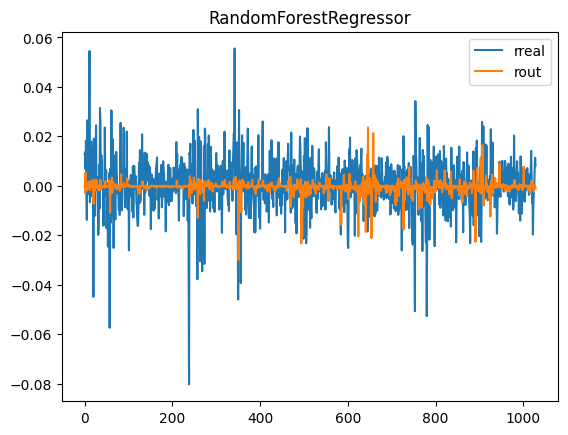

In [133]:
import statsmodels.api as sm
for i in dataL1:
    rreal=dataL1[i][dataL1[i]['YYYYmm']>201901][['stkdret']].values.reshape(-1)
    from sklearn.ensemble import RandomForestRegressor
    # 准备数据,'SMB1L1','HML1L1','RMW1L1','CMA1L1'
    X_train = dataL1[i][dataL1[i]['YYYYmm']<=201901][['RiskPremium1L1','SMB1L1','HML1L1','RMW1L1','CMA1L1']]  # 训练集特征
    y_train = dataL1[i][dataL1[i]['YYYYmm']<=201901]['stkdret']  # 训练集目标变量
    X_test=dataL1[i][dataL1[i]['YYYYmm']>201901][['RiskPremium1L1','SMB1L1','HML1L1','RMW1L1','CMA1L1']]
    # 创建随机森林模型
    model = RandomForestRegressor(n_estimators=100, max_depth=10)
    # 训练模型
    model.fit(X_train, y_train)
    # 获取特征重要性
    importances = model.feature_importances_
    # 打印特征重要性
    # for i, importance in enumerate(importances):
    #     print(f"Feature {i+1}: {importance}")
    rout = model.predict(X_test)
    rmean = np.mean(rreal)
    rfree=dataL1[i][dataL1[i]['YYYYmm']>201901]['rfL1'].values.reshape(-1)
    volt2 = np.sum(dataL1[i][dataL1[i]['YYYYmm']>201901]['stkdret'].values.reshape(-1)**2)
    R2os, MFSEadj, pvalue_MFSEadj = myfun_stat_gains(rout, rmean, rreal)
    Uout, Umean, DeltaU = myfun_econ_gains(rout, rmean, rreal, rfree, volt2, gmm=5)
    plt.figure()
    plt.title('RandomForestRegressor')
    plt.plot(rreal,label='rreal')
    plt.plot(rout,label='rout')
    plt.legend()
    plt.show()



Stat gains: R2os = -2.252521, MFSEadj = -0.738107, MFSEpvalue = 0.460618
Inference: 无样本外预测能力
Econ Gains: Delta U = -0.000007, Upred = 0.000060, Umean = 0.000067
Inference: 没有经济意义


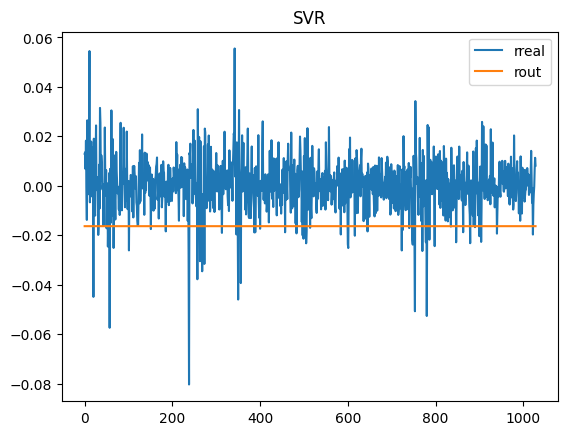

In [131]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

for i in dataL1:
    rreal=dataL1[i][dataL1[i]['YYYYmm']>201901][['stkdret']].values.reshape(-1)
    from sklearn.ensemble import RandomForestRegressor
    # 准备数据,'SMB1L1','HML1L1','RMW1L1','CMA1L1'
    X_train = dataL1[i][dataL1[i]['YYYYmm']<=201901][['RiskPremium1L1','SMB1L1','HML1L1','RMW1L1','CMA1L1']]  # 训练集特征
    y_train = dataL1[i][dataL1[i]['YYYYmm']<=201901]['stkdret']  # 训练集目标变量
    X_test=dataL1[i][dataL1[i]['YYYYmm']>201901][['RiskPremium1L1','SMB1L1','HML1L1','RMW1L1','CMA1L1']]
    # 创建SVM模型
    model = svm.SVR(kernel='rbf')
    # X_train, X_test, y_train, y_test = train_test_split(dataL1[i][['RiskPremium1L1','SMB1L1','HML1L1','RMW1L1','CMA1L1']], dataL1[i]['stkdret'], test_size=0.7, random_state=42)
    # 训练模型
    # 划分数据集为训练集和测试集

    model.fit(X_train, y_train)
    # print(X_train)
    # print(y_train)
    # 预测
    y_pred = model.predict(X_test)
    # 模型评估
    # rout = model.predict(X_test)
    rout=y_pred
    rmean = np.mean(rreal)
    rfree=dataL1[i][dataL1[i]['YYYYmm']>201901]['rfL1'].values.reshape(-1)
    volt2 = np.sum(dataL1[i][dataL1[i]['YYYYmm']>201901]['stkdret'].values.reshape(-1)**2)
    R2os, MFSEadj, pvalue_MFSEadj = myfun_stat_gains(rout, rmean, rreal)
    Uout, Umean, DeltaU = myfun_econ_gains(rout, rmean, rreal, rfree, volt2, gmm=5)
    plt.figure()
    plt.title('SVR')
    plt.plot(rreal,label='rreal')
    plt.plot(rout,label='rout')
    plt.legend()
    plt.show()

33/33 [==============================] - 0s 2ms/step
Stat gains: R2os = -0.000781, MFSEadj = -0.838280, MFSEpvalue = 0.402069
Inference: 无样本外预测能力
Econ Gains: Delta U = -0.000000, Upred = 0.000067, Umean = 0.000067
Inference: 没有经济意义


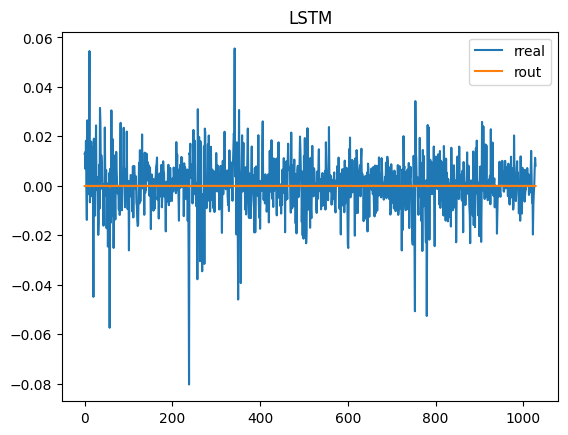

In [132]:
 from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from sklearn.metrics import mean_squared_error
for i in dataL1:
    rreal=dataL1[i][dataL1[i]['YYYYmm']>201901][['stkdret']].values.reshape(-1)
    from sklearn.ensemble import RandomForestRegressor
    # 准备数据,'SMB1L1','HML1L1','RMW1L1','CMA1L1'
    X_train = dataL1[i][dataL1[i]['YYYYmm']<=201901][['RiskPremium1L1','SMB1L1','HML1L1','RMW1L1','CMA1L1']].values  # 训练集特征
    y_train = dataL1[i][dataL1[i]['YYYYmm']<=201901]['stkdret'].values # 训练集目标变量
    X_test=dataL1[i][dataL1[i]['YYYYmm']>201901][['RiskPremium1L1','SMB1L1','HML1L1','RMW1L1','CMA1L1']].values
    # 创建SVM模型
    X_train=X_train.reshape(len(X_train),5,1)
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(5, 1)))
    model.add(Dense(1))  # 输出层
    # X_train, X_test, y_train, y_test = train_test_split(dataL1[i][['RiskPremium1L1','SMB1L1','HML1L1','RMW1L1','CMA1L1']], dataL1[i]['stkdret'], test_size=0.7, random_state=42)
    # 训练模型
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train)
    # 模型评估
    rout = model.predict(X_test)
    rout=rout.reshape(-1)
    rmean = np.mean(rreal)
    rfree=dataL1[i][dataL1[i]['YYYYmm']>201901]['rfL1'].values.reshape(-1)
    volt2 = np.sum(dataL1[i][dataL1[i]['YYYYmm']>201901]['stkdret'].values.reshape(-1)**2)
    R2os, MFSEadj, pvalue_MFSEadj = myfun_stat_gains(rout, rmean, rreal)
    Uout, Umean, DeltaU = myfun_econ_gains(rout, rmean, rreal, rfree, volt2, gmm=5)
    plt.figure()
    plt.title('LSTM')
    plt.plot(rreal,label='rreal')
    plt.plot(rout,label='rout')
    plt.legend()
    plt.show()

Stat gains: R2os = 0.002565, MFSEadj = 1.107871, MFSEpvalue = 0.268177
Inference: 无样本外预测能力
Econ Gains: Delta U = 0.000002, Upred = 0.000069, Umean = 0.000067
Inference: 有经济意义


F:\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but PLSRegression was fitted with feature names
  warnings.warn(
F:\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but PLSRegression was fitted with feature names
  warnings.warn(


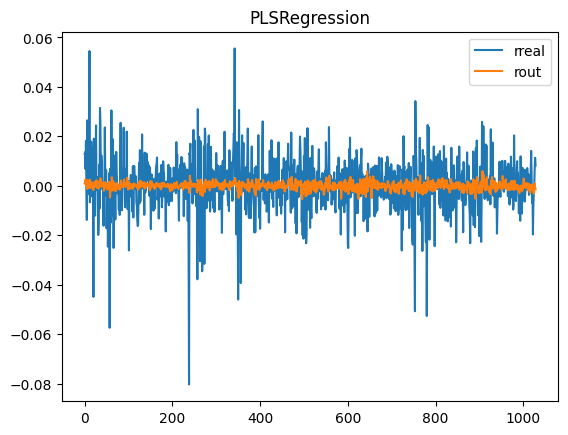

In [136]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

for i in dataL1:
    rreal=dataL1[i][dataL1[i]['YYYYmm']>201901][['stkdret']].values.reshape(-1)
    from sklearn.ensemble import RandomForestRegressor
    # 准备数据,'SMB1L1','HML1L1','RMW1L1','CMA1L1'
    X_train = dataL1[i][dataL1[i]['YYYYmm']<=201901][['RiskPremium1L1','SMB1L1','HML1L1','RMW1L1','CMA1L1']]  # 训练集特征
    y_train = dataL1[i][dataL1[i]['YYYYmm']<=201901]['stkdret'].values  # 训练集目标变量
    X_test=dataL1[i][dataL1[i]['YYYYmm']>201901][['RiskPremium1L1','SMB1L1','HML1L1','RMW1L1','CMA1L1']].values
    # 准备数据集，假设X是输入变量，y是输出变量
    # X和y应该是数值型的特征矩阵和目标向量
    # 这里只是示例数据，你需要根据实际情况替换为你自己的数据
    # 数据预处理 - 标准化
    X=dataL1[i][['RiskPremium1L1','SMB1L1','HML1L1','RMW1L1','CMA1L1']].values
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    # 应用PLSR算法
    n_components = 2  # 设置偏最小二乘回归因子的数量
    pls = PLSRegression(n_components=n_components)
    pls.fit(X_train, y_train)
    # 模型评估 - 在测试集上进行预测并计算评估指标
    y_pred = pls.predict(X_test)
    mse = mean_squared_error(rreal, y_pred)
    r2 = r2_score(rreal, y_pred)
    # 使用训练好的模型进行预测
    new_data_scaled = scaler.transform(X_test)
    rout = pls.predict(X_test)
    rout=rout.reshape(-1)
    rmean = np.mean(rreal)
    rfree=dataL1[i][dataL1[i]['YYYYmm']>201901]['rfL1'].values.reshape(-1)
    volt2 = np.sum(dataL1[i][dataL1[i]['YYYYmm']>201901]['stkdret'].values.reshape(-1)**2)
    R2os, MFSEadj, pvalue_MFSEadj = myfun_stat_gains(rout, rmean, rreal)
    Uout, Umean, DeltaU = myfun_econ_gains(rout, rmean, rreal, rfree, volt2, gmm=5)
    plt.figure()
    plt.title('PLSRegression')
    plt.plot(rreal,label='rreal')
    plt.plot(rout,label='rout')
    plt.legend()
    plt.show()



F:\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
  warnings.warn(
F:\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
  warnings.warn(


均方根误差 (RMSE): 0.00015136361144181852
决定系数 (R-squared): -0.23725090129064097
Stat gains: R2os = -5.331139, MFSEadj = -0.042760, MFSEpvalue = 0.965901
Inference: 无样本外预测能力
Econ Gains: Delta U = 0.000012, Upred = 0.000079, Umean = 0.000067
Inference: 有经济意义


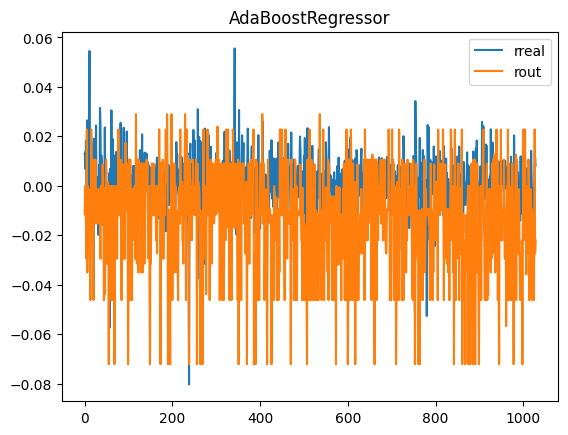

In [137]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
for i in dataL1:
    rreal=dataL1[i][dataL1[i]['YYYYmm']>201901][['stkdret']].values.reshape(-1)
    from sklearn.ensemble import RandomForestRegressor
    # 准备数据,'SMB1L1','HML1L1','RMW1L1','CMA1L1'
    X_train = dataL1[i][dataL1[i]['YYYYmm']<=201901][['RiskPremium1L1','SMB1L1','HML1L1','RMW1L1','CMA1L1']]  # 训练集特征
    y_train = dataL1[i][dataL1[i]['YYYYmm']<=201901]['stkdret'].values  # 训练集目标变量
    X_test=dataL1[i][dataL1[i]['YYYYmm']>201901][['RiskPremium1L1','SMB1L1','HML1L1','RMW1L1','CMA1L1']].values
    # 准备数据集，假设X是输入变量，y是输出变量
    # X和y应该是数值型的特征矩阵和目标向量
    # 这里只是示例数据，你需要根据实际情况替换为你自己的数据
    X=dataL1[i][['RiskPremium1L1','SMB1L1','HML1L1','RMW1L1','CMA1L1']].values
    # 数据预处理 - 标准化
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    # 应用AdaBoost算法
    n_estimators = 50  # 设置弱分类器的数量
    ada_boost = AdaBoostRegressor(n_estimators=n_estimators)
    ada_boost.fit(X_train, y_train)
    # 模型评估 - 在测试集上进行预测并计算评估指标
    y_pred = ada_boost.predict(X_test)
    mse = mean_squared_error(rreal, y_pred)
    r2 = r2_score(rreal, y_pred)
    print("均方根误差 (RMSE):", mse)
    print("决定系数 (R-squared):", r2)
    # 使用训练好的模型进行预测
    new_data_scaled = scaler.transform(X_test)
    rout = ada_boost.predict(new_data_scaled)
    rout=rout.reshape(-1)
    rmean = np.mean(rreal)
    rfree=dataL1[i][dataL1[i]['YYYYmm']>201901]['rfL1'].values.reshape(-1)
    volt2 = np.sum(dataL1[i][dataL1[i]['YYYYmm']>201901]['stkdret'].values.reshape(-1)**2)
    R2os, MFSEadj, pvalue_MFSEadj = myfun_stat_gains(rout, rmean, rreal)
    Uout, Umean, DeltaU = myfun_econ_gains(rout, rmean, rreal, rfree, volt2, gmm=5)
    plt.figure()
    plt.title('AdaBoostRegressor')
    plt.plot(rreal,label='rreal')
    plt.plot(rout,label='rout')
    plt.legend()
    plt.show()
